In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import DistanceMetric
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Parkinsson disease.csv'
df = pd.read_csv(file_path)
X = df.drop(['name','status'], axis=1)
y = df['status']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
print("Rozmiar przed nadprobkowaniem",X.shape)
print("Rozmiar po nadpróbkowaniu",X_resampled.shape)

Rozmiar przed nadprobkowaniem (195, 22)
Rozmiar po nadpróbkowaniu (294, 22)


In [ ]:
df1=pd.concat([X_resampled,y_resampled],axis=1)
df1.shape

(294, 23)

In [ ]:
df1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,243.119163,250.727397,232.063941,0.002145,0.000009,0.001121,0.001393,0.003363,0.014361,0.127956,...,0.023698,0.004687,25.232508,0.431437,0.636257,-7.070877,0.091970,2.335149,0.091653,0
290,113.951292,117.202033,94.052415,0.003429,0.000030,0.001640,0.001977,0.004931,0.013920,0.125477,...,0.020853,0.005407,26.053238,0.429030,0.736727,-6.157144,0.180320,1.869664,0.163543,0
291,191.203091,413.870166,76.678321,0.006966,0.000038,0.003466,0.003678,0.010389,0.022046,0.229625,...,0.036195,0.066228,19.570680,0.458309,0.645784,-6.709208,0.199123,2.139844,0.124734,0
292,119.839649,198.941635,104.078872,0.005212,0.000048,0.002372,0.003070,0.007117,0.019634,0.178572,...,0.028504,0.010125,22.886095,0.605519,0.687467,-5.591254,0.221884,2.145160,0.227271,0


In [ ]:
df = df.drop(['name'], axis=1)

In [ ]:
df.shape

(195, 23)

In [ ]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
MDVPFlo = df['MDVP:Flo(Hz)']
MDVPFo = df['MDVP:Fo(Hz)']
MDVPFhi = df['MDVP:Fhi(Hz)']

status = df['status']

df_viol=pd.concat([MDVPFlo,MDVPFo, MDVPFhi, status],axis=1)

In [ ]:
df_viol.shape

(195, 4)

In [ ]:
df_viol

,MDVP:Flo(Hz),MDVP:Fo(Hz),MDVP:Fhi(Hz),status
0,74.997,119.992,157.302,1
1,113.819,122.400,148.650,1
2,111.555,116.682,131.111,1
3,111.366,116.676,137.871,1
4,110.655,116.014,141.781,1
...,...,...,...,...
190,94.261,174.188,230.978,0
191,89.488,209.516,253.017,0
192,74.287,174.688,240.005,0
193,74.904,198.764,396.961,0


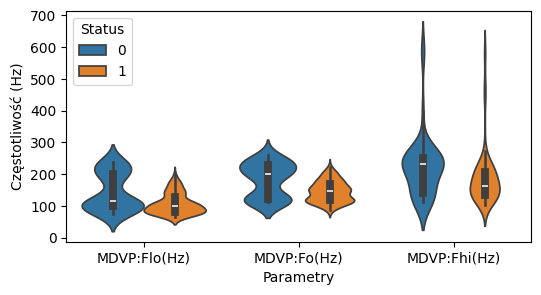

In [ ]:
df_viol_melted = df_viol.melt(id_vars='status', var_name='Parametry', value_name='Częstotliwość (Hz)')

plt.figure(figsize=(6,3))
#plt.grid(True, axis='y')

sns.violinplot(data=df_viol_melted, x="Parametry", y="Częstotliwość (Hz)", hue="status")

plt.legend(title='Status', loc='upper left')

plt.show()


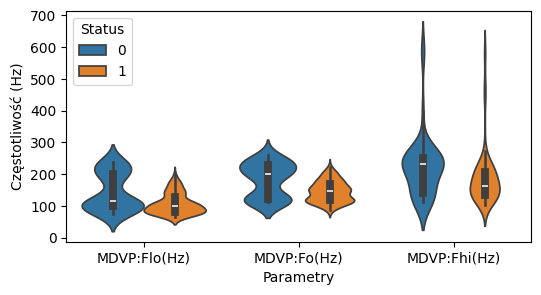

In [ ]:
MDVPFlo1 = df1['MDVP:Flo(Hz)']
MDVPFo1 = df1['MDVP:Fo(Hz)']
MDVPFhi1 = df1['MDVP:Fhi(Hz)']

status = df1['status']

df_viol1=pd.concat([MDVPFlo1,MDVPFo1, MDVPFhi1, status],axis=1)

df_viol_melted1 = df_viol1.melt(id_vars='status', var_name='Parametry', value_name='Częstotliwość (Hz)')

plt.figure(figsize=(6,3))


sns.violinplot(data=df_viol_melted, x="Parametry", y="Częstotliwość (Hz)", hue="status")

plt.legend(title='Status', loc='upper left')

plt.show()
